# Lab 2: Clustering

Welcome to the advanced Machine Learning Course.

The objective of this lab session is to code a few regression algorithms and to apply them to synthetic and real datasets.

Please put **"ML - MSc - TD2"** in the mail subject or I might lose your work (which means 0) and send it to pierre.houdouin@centralesupelec.fr

Please label your notebook **"L2_familyname1_familyname2.ipynb"** or I might lose your work (which means 0).

We begin with the standard imports:

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster # all clustering techniques except hdbscan
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

We will have two toy datasets to try the different methods:

There are a lot of clustering algorithms to choose from the `sklearn` library. So what clustering algorithms should you be using? It depends.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


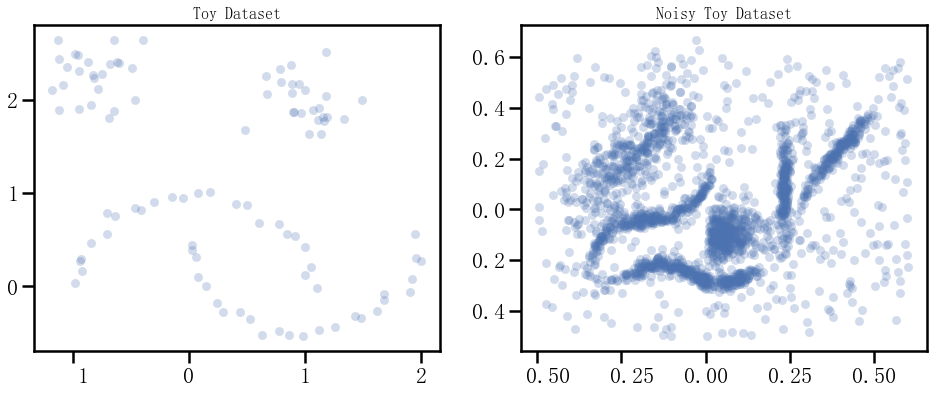

In [108]:
import sklearn.datasets as data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data_0 = np.vstack([moons, blobs])

test_data_1 = np.load('clusterable_data.npy')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c='b', **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], color='b', **plot_kwds)
ax[1].set_title('Noisy Toy Dataset', size=16)

plt.show();

## K-means

K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). However, K-Means has a few problems caused by its simplicity. 

We try the `sklearn` implementation in our toy datasets:

## Aglomerative Single Linkage clustering

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


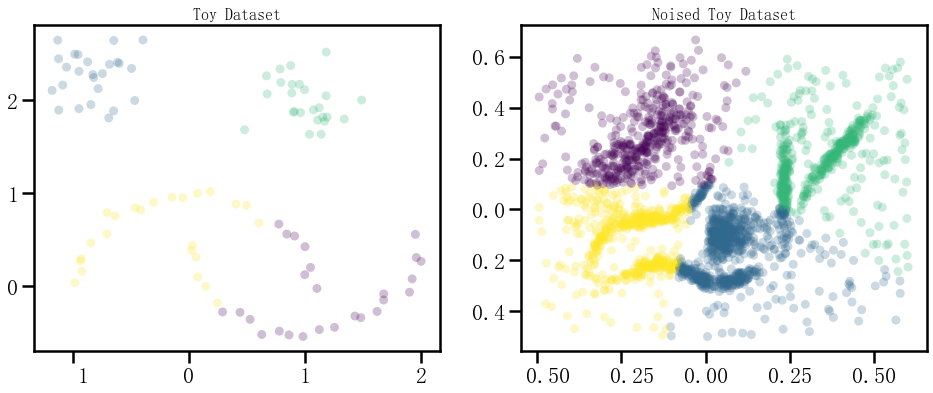

In [109]:
from sklearn.cluster import KMeans
kmeans_0 = KMeans(n_clusters=4, max_iter=200).fit(test_data_0)
kmeans_1 = KMeans(n_clusters=4, max_iter=200).fit(test_data_1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=kmeans_0.labels_ , **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=kmeans_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)


plt.show();

Agglomerative clustering is a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it's own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. Do this repeatedly until you have only one cluster and you get get a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset. The most basic version of this, single linkage, chooses the closest cluster to merge, and hence the tree can be ranked by distance as to when clusters merged/split.

**Code your own Aglomerative Single Linkage clustering algorithm**!:

- Fill in the class 
- During the process, keep track of the cluster merges by saving a (num_samples-1,4) np.array being a linkage matrix in scypy format (to use their function to plot dendrogram: `scipy.cluster.hierarchy.dendrogram`). check documentation.

In [130]:
from scipy.spatial import distance 
from scipy.cluster.hierarchy import dendrogram
class my_SingleLinkageAglomerativeClustering():
    
    def __init__(self, metric="euclidean", n_clusters=3):
        '''
        Attributes:
        
        metric_: {"euclidean","precomputed"}
            the distance to be used
            if precomputed then X is distance matrix
        n_clusters: integer
            number of clusters to return 
        linkage_matrix_: (n-1, 4) np.array
            in the same format as linkage  
        labels_: integer np.array
            label assigment
        hierarchy_: list of np.array
            each array corresponds to label assigment
            at each level (number of clusters)
            hierarchy_[0]=np.array(list(range(n)))
        '''
        self.metric_ = metric
        self.n_clusters_ = n_clusters
        self.linkage_matrix_ = None
        self.labels_ = None
        self.hierarchy_ = None
        
    def fit(self, X):
        """ Create a hierarchy of clusters
        
        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix
        
        Returns:
        -----
        self: my_SingleLinkageAglomerativeClustering
            to have access to labels_
        """
        # if it's not precomputed compute the distance matrix
        # using from scipy.spatial import distance 
        distance_matrix = distance.squareform(distance.pdist(X, metric=self.metric_))
        
        # Initialization : 
        n = len(X)
        number_cluster =  n
        self.hierarchy_ = [] # update with the new lables 
        self.labels_ = np.array(list(range(n)))
#         self.linkage_matrix_ = np.zeros((n-self.n_clusters_,4))
        self.linkage_matrix_ = np.zeros((n-1,4))
    
        
        iteration = 0
#         while number_cluster > self.n_clusters_ :
        while number_cluster > 1 :
        
            mindist = np.min(distance_matrix[np.nonzero(distance_matrix)])
            p1 = np.where(distance_matrix==np.min(distance_matrix[np.nonzero(distance_matrix)]))[0][0]
            p2 = np.where(distance_matrix==np.min(distance_matrix[np.nonzero(distance_matrix)]))[0][1]
            
            # update labels :
            self.labels_[(self.labels_ == p1) | (self.labels_ == p2)] = n+iteration
            
            # update the hierarchy list:
            self.hierarchy_.append(self.labels_.copy())
                                
            # update the distance matrix:
            row = np.array([[min(distance_matrix[i,p1], distance_matrix[i,p2]) for i in range(distance_matrix.shape[0])]])
            distance_matrix = np.r_[distance_matrix, row]
            row = np.c_[row, 0]
            distance_matrix = np.c_[distance_matrix, row.T]
            
            distance_matrix[p1].fill(0)
            distance_matrix[p2].fill(0)
            distance_matrix[:, p1].fill(0)
            distance_matrix[:, p2].fill(0)
            
            # update linkage_matrix:
            self.linkage_matrix_[iteration] = [p1, p2, mindist, (self.labels_ == n+iteration).sum()]
            
            # update number of clusters:
            number_cluster = len(np.unique(self.labels_))
            
            iteration += 1
            
            
        # It seems that in order to plot dendrogram, we have to iterate until having only one cluster at end
        # But self.labels_ is updated with cluster labels according to self.n_clusters_ which is 3 here
        self.labels_ = self.hierarchy_[- self.n_clusters_] 
        
        
        # HINT:
        # You can use a minimum spanning tree and add merge in increasing order
        # or modifying the distance matrix 
        # (add row/column for new clusters and remove/put zero in old row/colums)
        # keep track of merges in linkage_matrix_ and labels in hierarchy_
        # update labels_ from the hierarchy level selected by n_clusters_ 
        
    def plot_dendrogram(self):
        '''Use self.linkage_matrix_ in `scipy.cluster.hierarchy.dendrogram` 
        to plot the dendrogram of the hierarchical structure
        ''' 
        plt.figure()
        dn = dendrogram(self.linkage_matrix_, p=8, truncate_mode='level')

Apply the method to our toy datasets

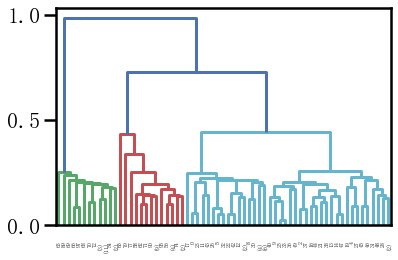

In [131]:
# fit toy dataset: test_data_0
model = my_SingleLinkageAglomerativeClustering(metric="euclidean", n_clusters=3)
model.fit(test_data_0)
model.plot_dendrogram()

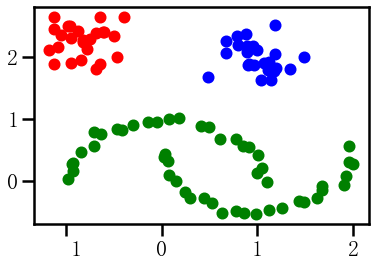

In [137]:
# visualise the clustering results in scatter:

cluster_index = np.unique(model.labels_)
num = len(cluster_index)
index_dict = {}
for i in range(len(model.labels_)):
    index_dict.setdefault(model.labels_[i], []).append(i)

color = ['green', 'blue', 'red']
color_index = 0
for key, value in index_dict.items():
    x = [test_data_0[i][0] for i in value]
    y = [test_data_0[i][1] for i in value]
    plt.scatter(x, y, s=100, c= color[color_index])
    color_index += 1

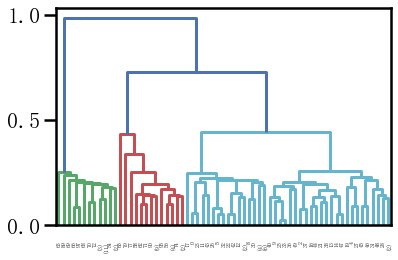

In [138]:
from scipy.cluster import hierarchy
# Validate the model by using sklearn:
linkage_matrix = hierarchy.linkage(distance.pdist(test_data_0, metric='euclidean'), method='single')
den = dendrogram(linkage_matrix, p=8, truncate_mode='level')
plt.show()

In [139]:
# Validate that the result from my algorithm is exactly the same as the result from sklearn           

np.unique(linkage_matrix == model.linkage_matrix_)

array([ True])

silhouette_score: 0.5458110527592724


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


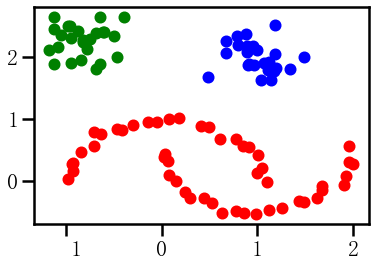

In [129]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score 

skmodel = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
y_sk = skmodel.fit_predict(test_data_0)                                                                                                           

plt.scatter(test_data_0[y_sk ==0,0], test_data_0[y_sk == 0,1], s=100, c='red')
plt.scatter(test_data_0[y_sk==1,0], test_data_0[y_sk == 1,1], s=100, c='green')
plt.scatter(test_data_0[y_sk ==2,0], test_data_0[y_sk == 2,1], s=100, c='blue')

# calculate sihouette coefficient to evaluate the clustering performance:
ss = silhouette_score(test_data_0, skmodel.labels_) 
print('silhouette_score: {}'.format(ss))

Try the different linkage methods implemented in `sklearn`  and comment

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing 

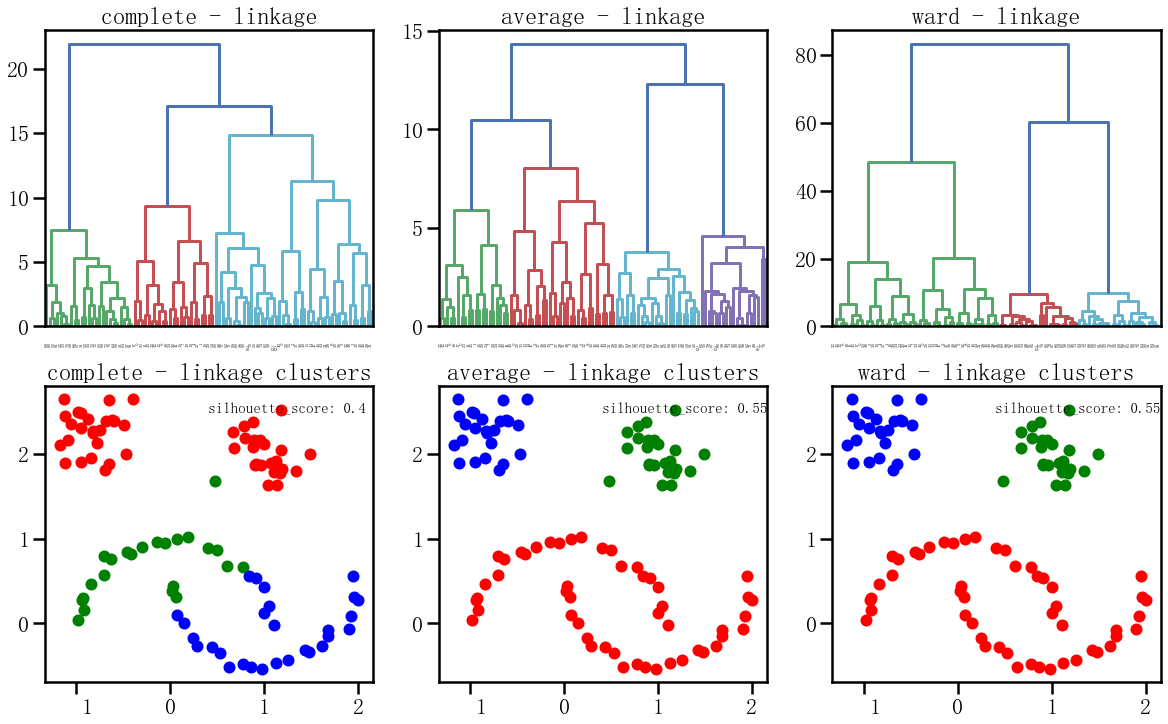

In [140]:
# TODO
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score 

plt.figure(figsize=(20,12))
i = 1
for linkmethod in ['complete', 'average', 'ward']:
    
    linkage_matrix = hierarchy.linkage(distance.squareform(distance.pdist(test_data_0, metric='euclidean')), method=linkmethod, metric='euclidean')
    plt.subplot(2,3,i)
    den = hierarchy.dendrogram(linkage_matrix, p=8, truncate_mode='level')
    plt.title('{} - linkage'.format(linkmethod))
    
    j = 3+i
    i += 1
    
    skmodel = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = linkmethod)
    y_sk = skmodel.fit_predict(test_data_0)
    ss = silhouette_score(test_data_0, skmodel.labels_) 
    
    plt.subplot(2,3,j)
    plt.scatter(test_data_0[y_sk ==0,0], test_data_0[y_sk == 0,1], s=100, c='red')
    plt.scatter(test_data_0[y_sk==1,0], test_data_0[y_sk == 1,1], s=100, c='green')
    plt.scatter(test_data_0[y_sk ==2,0], test_data_0[y_sk == 2,1], s=100, c='blue')
    plt.title('{} - linkage clusters'.format(linkmethod))
    plt.text(0.4, 2.5, 'silhouette_score: {:.2}'.format(ss), fontsize=15)

Comments:
Based on the dendrograms of clustering models that are created directly by sklearn, we can notice that, using different linkage methodes, the clustering results differ a lot. 
Through dendrigrams, we find that the model using single linkage has the smallest distance overall, while the distance in models of complete linkage and ward linkage are much larger. Since methode of single linkage attemps to measure the proximity by two closest items, it's reasonable that the largest dissimilarity (highest value in y-axis) is the smallest of all cases. Similarly, methode of complete linkage measures proximity from two mpst distant items, it also make senses that in dendrogram, the dissimilarity when there's only one cluster is larger than that in model of single linkage or average linkage.
The scatter plots more clearly how the points are clustered into 3 clusters. We can perceive that the model using single linkage has more dense clusters than others in this case. From the calculation of sihouette score, which measures seaparation between cluster, we can see that method of single linkage works better in this dataset because its value of sihouette score is much higher.

Based on results above, we see the hierarical clustering results using distinct linkage methods (complete, average, ward) through dendrograms. 

## DBSCAN

DBSCAN is a density based algorithm -- it assumes clusters for dense regions. It is also the first actual clustering algorithm we've looked at: it doesn't require that every point be assigned to a cluster and hence doesn't partition the data, but instead extracts the 'dense' clusters and leaves sparse background classified as 'noise'. In practice DBSCAN is related to agglomerative clustering. As a first step DBSCAN transforms the space according to the density of the data: points in dense regions are left alone, while points in sparse regions are moved further away. Applying single linkage clustering to the transformed space results in a dendrogram, which we cut according to a distance parameter (called epsilon or `eps` in many implementations) to get clusters. Importantly any singleton clusters at that cut level are deemed to be 'noise' and left unclustered. 

Apply it to the test_data, how do you tune the parameters?

In [382]:
# TODO
# Use the noised toy data here:

dbscan_model = cluster.DBSCAN(eps = 0.08, min_samples = 5, metric='euclidean').fit(test_data_1)
ss = silhouette_score(test_data_1, dbscan_model.labels_) 
print(ss)

0.14267071916976876


In [385]:
# Using K-means algorithim to find an ideal no of clusters for noised toy data by silhouette analysis:
range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = n_clusters, max_iter=200)
    kmeans_labels = kmeans.fit_predict(test_data_1)
    
    silhouette_avg = silhouette_score(test_data_1, kmeans_labels)
    print("For {}".format(n_clusters), " clusters, The average silhouette score is {}".format(silhouette_avg))

For 2  clusters, The average silhouette score is 0.4011004159737663
For 3  clusters, The average silhouette score is 0.46319107032549806
For 4  clusters, The average silhouette score is 0.4291458826899475
For 5  clusters, The average silhouette score is 0.40604772344821677
For 6  clusters, The average silhouette score is 0.4080656577651516


From this sample test, we can suggest the number of clusters to be 3 in the dataset of noised toy data.

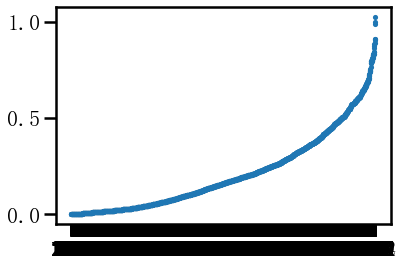

In [421]:
# Find optimum epsilon using euclidean distance method:
import pandas as pd

df_data_1 = pd.DataFrame(test_data_1,columns=['x', 'y'])
df_data_1 = df_data_1.sort_values(by=['x', 'y'])

df2 = pd.DataFrame(columns = ['index', 'distance'])
for i in range(len(df_data_1)-1):
    dist = np.linalg.norm(df_data_1.iloc[i] - df_data_1.iloc[i+1])
    df2 = df2.append({'index': str(i), 'distance': dist}, ignore_index=True)

df2 = df2.sort_values(by=['distance'])
plt.scatter(df2['index'], df2['distance'], s=10)
plt.show()

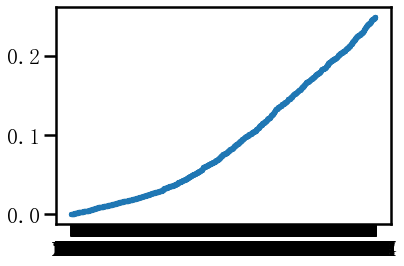

In [420]:
# From the previous elbow curve, I'd like to narrow down the distance between 0.01 to 0.25
df3 = df2[df2['distance']<0.25]
df3 = df3.sort_values(by=['distance'])
plt.scatter(df3['index'], df3['distance'], s=10)
plt.show()

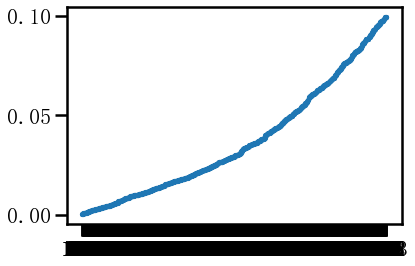

In [422]:
# From the previous elbow curve, I'd like to narrow down the distance between 0.01 to 0.1 again
df4 = df3[df3['distance']<0.1]
df4 = df4.sort_values(by=['distance'])
plt.scatter(df4['index'], df4['distance'], s=10)
plt.show()

In [452]:
# Based on the previous analysis through elbow curve, we can filter a more narrow range of epsilon:
# In order to find optimal epsilon:

for i in np.arange(0.03, 0.05, 0.002):
    db =  cluster.DBSCAN(eps = i, min_samples = 10, metric='euclidean').fit(test_data_1)
    ss = silhouette_score(test_data_1, db.labels_) 

    print('eps = {:.3}'.format(i), 'clusters = {}'. format(np.unique(db.labels_)), 'Silhouette_score = {}'.format(ss))

eps = 0.03 clusters = [-1  0  1  2  3  4  5] Silhouette_score = 0.1920071495224878
eps = 0.032 clusters = [-1  0  1  2  3  4] Silhouette_score = 0.18725050010271463
eps = 0.034 clusters = [-1  0  1  2] Silhouette_score = 0.24955978006414656
eps = 0.036 clusters = [-1  0  1  2  3] Silhouette_score = 0.14864261669801634
eps = 0.038 clusters = [-1  0  1  2  3] Silhouette_score = 0.15456060591710044
eps = 0.04 clusters = [-1  0  1] Silhouette_score = 0.02326628963394375
eps = 0.042 clusters = [-1  0  1] Silhouette_score = 0.0264958431060739
eps = 0.044 clusters = [-1  0] Silhouette_score = 0.2923896686671459
eps = 0.046 clusters = [-1  0] Silhouette_score = 0.2936737785814769
eps = 0.048 clusters = [-1  0] Silhouette_score = 0.29852195805865533
eps = 0.05 clusters = [-1  0] Silhouette_score = 0.29774771040283177


In [454]:
# According to previous analysis on epsilon,it seems that when epsilon has a value of 0.034
# silhouette score has higher values 
# Therefore, finding the optimal Minpts parameter :

for i in range(5, 16):
    db =  cluster.DBSCAN(eps = 0.034, min_samples = i, metric='euclidean').fit(test_data_1)
    ss = silhouette_score(test_data_1, db.labels_) 
    
    print('MinPts = {}'.format(i), 'clusters = {}'. format(np.unique(db.labels_)), 'Silhouette_score = {}'.format(ss))

MinPts = 5 clusters = [-1  0  1  2  3  4  5  6] Silhouette_score = -0.305373153676426
MinPts = 6 clusters = [-1  0  1  2  3] Silhouette_score = 0.010154554326323707
MinPts = 7 clusters = [-1  0  1] Silhouette_score = 0.2673888682319367
MinPts = 8 clusters = [-1  0  1  2] Silhouette_score = 0.029648547041960297
MinPts = 9 clusters = [-1  0  1  2  3] Silhouette_score = 0.007614309354866702
MinPts = 10 clusters = [-1  0  1  2] Silhouette_score = 0.24955978006414656
MinPts = 11 clusters = [-1  0  1  2] Silhouette_score = 0.2458000908666122
MinPts = 12 clusters = [-1  0  1  2  3] Silhouette_score = 0.22685819417707934
MinPts = 13 clusters = [-1  0  1  2  3  4  5] Silhouette_score = 0.24994331935108743
MinPts = 14 clusters = [-1  0  1  2  3  4  5  6] Silhouette_score = 0.1786568458578373
MinPts = 15 clusters = [-1  0  1  2  3  4  5] Silhouette_score = 0.24009126398768235


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


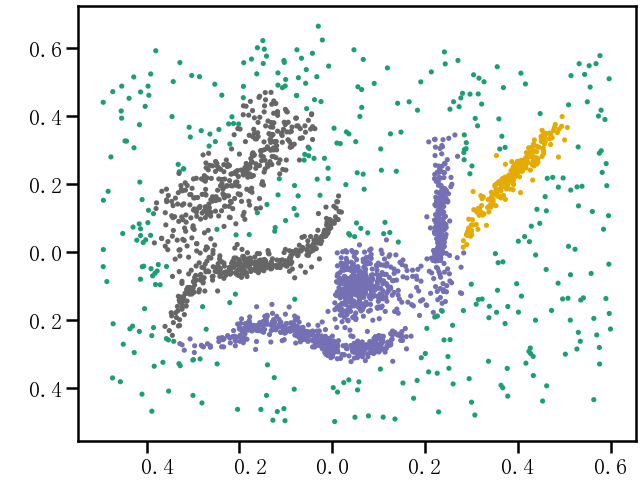

In [517]:
# Based the previous analysis, we can tell that when epsilon equals to 0.034, MinPts equals to 10, 
# the number of clusters is 3 and the silhouette score (0.25) is relatively high.
db =  cluster.DBSCAN(eps = 0.034, min_samples = 10, metric='euclidean')
y_predict = db.fit_predict(test_data_1)

plt.figure(figsize=(10,8))
plt.scatter(test_data_1[:, 0], test_data_1[:, 1], c=y_predict, s=10, cmap='Dark2')



I find that in the previous modeling using DBSCAN, the clustering result is highly sensitive to the value of epsilon. When I tried to lower down the value of epsilon, the clustering results leave too many noise data. When I tried to increase epsilon, the model almost merges everything into one single massive cluster. 

## HDBSCAN

HDBSCAN is a recent algorithm developed by some of the same people who write the original DBSCAN paper. Their goal was to allow varying density clusters. The algorithm starts off much the same as DBSCAN: we transform the space according to density, exactly as DBSCAN does, and perform single linkage clustering on the transformed space. Instead of taking an epsilon value as a cut level for the dendrogram however, a different approach is taken: the dendrogram is condensed by viewing splits that result in a small number of points splitting off as points 'falling out of a cluster'. This results in a smaller tree with fewer clusters that 'lose points'. That tree can then be used to select the most stable or persistent clusters. This process allows the tree to be cut at varying height, picking our varying density clusters based on cluster stability.

In [519]:
pip install hdbscan

     |████████████████████████████████| 5.2 MB 9.8 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.9 MB 18.1 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 31.6 MB/s eta 0:00:01
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp37-cp37m-macosx_10_9_x86_64.whl size=701247 sha256=27db30ecc1426a90add029cc4add0ed4e6a30cfcf691df478e9e5181f2ffcd58
  Stored in directory: /Users/a/Library/Caches/pip/wheels/af/1f/71/ad36cf482247fc0725b271e8ce10f9ee5f84414d1783c875b2
Successfully built hdbscan
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1
  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
Note: you may need to restart the kernel to u

In [531]:
import hdbscan
# TODO

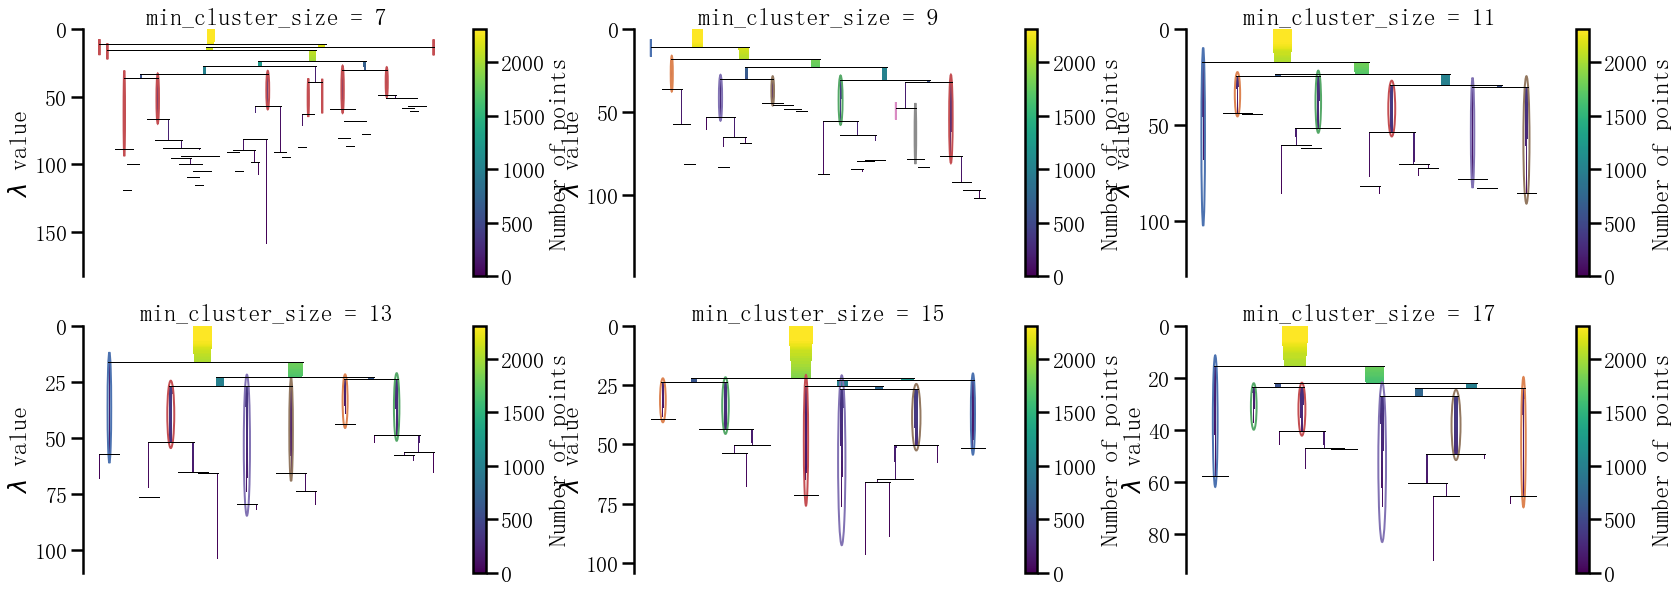

In [555]:
# Try different values of parameter 'min_cluster_size' and plot condensed trees:
plt.figure(figsize=(28,10))
j = 1
for i in range(7,19,2):
    
    hdb = hdbscan.HDBSCAN(min_cluster_size=i).fit(test_data_1)
    plt.subplot(2,3,j)
    hdb.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))
    plt.title('min_cluster_size = {}'.format(i))
    j += 1

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


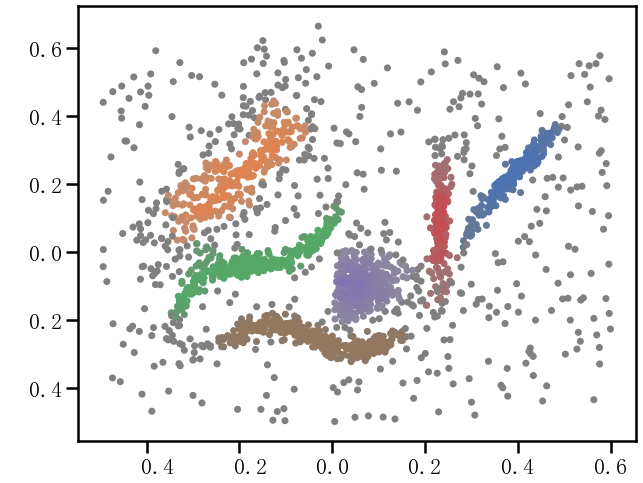

In [556]:
# Based on previous plots, we can find a plot which has longest cluster bar, that's when min_cluster_size = 15
# In other words, when min_cluster_size = 15, HDBSCAN is able to create stable clusters from noise data.
hdb = hdbscan.HDBSCAN(min_cluster_size = 15).fit(test_data_1)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in hdb.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, hdb.probabilities_)]
plt.figure(figsize=(10,8))
plt.scatter(*test_data_1.T, s=50, linewidth=0, c=cluster_member_colors, alpha=1)

## Apply the algorithms to the following images and comment the results

### NASA Curiosity Picture

- Look at following NASA photo taken by a robot in mars:


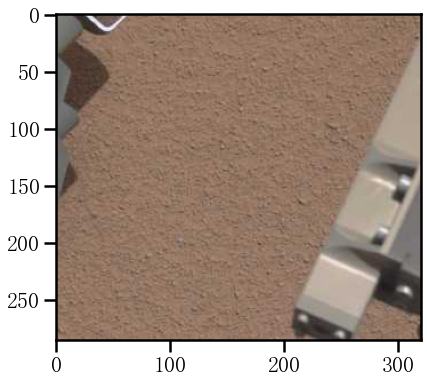

In [141]:
from PIL import Image

Im_1  = Image.open('im_nasa_reduced.jpg')

fig = plt.figure(figsize=(8, 6))
plt.imshow(Im_1)
plt.show()

- Transform the image to an intensity (I) and saturation (S) representation, it helps to distinguish bright and textures.

$$I=\frac{R+G+B}{3}$$
$$S=1-I\times min(R, G, B)$$

In [142]:
# TODO:
# Convert the image to a NumPy array:
im_array = np.array(Im_1)

# Calculate the intensity representation:
I = np.array(Im_1.convert('L'))

#Calculate the saturation representation:
hsv_image = Im_1.convert('HSV')
S = np.array(hsv_image)[:,:,1]

print(S.shape)
print(I.shape)


(286, 320)
(286, 320)


In [143]:
# Combine I and S, form an appropriate format of data input :

# flatten the array in row-major order
S_flat = S.flatten() 
I_flat = I.flatten()
# Combine two one-dimensional array to a two-dimensional array: 
data_image = np.array(list(zip(S_flat, I_flat)))
print(data_image.shape)

(91520, 2)


- Apply the seen algorithms to segment the image in the Intensity-Saturation representation, comment the results and check if you find something on mars' surface. Be careful with hdbscan and memory errors for some parameters choice (use algorithm='boruvka_kdtree').

In [144]:
# TODO
# considering the image data involves high dimensional data, DBSCAN may have better performance in this case
# Try different values of epsilon :
for eps in np.arange(0.5, 5, 0.5):
    db_image =  cluster.DBSCAN(eps = eps, min_samples = 5, metric='euclidean').fit(data_image)
    ss = silhouette_score(data_image, db_image.labels_) 
    print('epsilon = {:.2}'.format(eps), 'n_clusters = {}'.format(len(np.unique(db_image.labels_))),'silhouette score = {:.3}'.format(ss))


epsilon = 0.5 n_clusters = 1294 silhouette score = 0.828
epsilon = 1.0 n_clusters = 433 silhouette score = -0.5
epsilon = 1.5 n_clusters = 126 silhouette score = -0.521
epsilon = 2.0 n_clusters = 69 silhouette score = -0.17
epsilon = 2.5 n_clusters = 29 silhouette score = 0.184
epsilon = 3.0 n_clusters = 12 silhouette score = 0.454
epsilon = 3.5 n_clusters = 8 silhouette score = 0.102
epsilon = 4.0 n_clusters = 5 silhouette score = 0.157
epsilon = 4.5 n_clusters = 5 silhouette score = 0.34


In [39]:
# From the previous analysis, we can find that this dbscan model is very sensitive to the value of epsilon
# when the value of epsilon increases, the silhouette score varies largely.
# Based on this result, I think dbscan might not be the best model in this case
# In the second step, I want to try HDBSCAN model :
import hdbscan
for i in range(2500, 3000, 100):
    
    hdb_image = hdbscan.HDBSCAN(min_cluster_size = i).fit(data_image)
    ss = silhouette_score(data_image, hdb_image.labels_) 
    print('min_cluster_size = {}'.format(i), 'n_clusters = {}'.format(len(np.unique(hdb_image.labels_))),'silhouette score = {:.3}'.format(ss))



min_cluster_size = 2500 n_clusters = 8 silhouette score = -0.102
min_cluster_size = 2600 n_clusters = 4 silhouette score = 0.682
min_cluster_size = 2700 n_clusters = 3 silhouette score = 0.695
min_cluster_size = 2800 n_clusters = 3 silhouette score = 0.691
min_cluster_size = 2900 n_clusters = 3 silhouette score = 0.692


In [41]:
# Based on some basic understanding, the number of cluster should not be too large:
# I will try more times in a narrow range of min_cluster_size between 2500 and 2600
for i in range(2520, 2620, 20):
    
    hdb_image = hdbscan.HDBSCAN(min_cluster_size = i).fit(data_image)
    ss = silhouette_score(data_image, hdb_image.labels_) 
    print('min_cluster_size = {}'.format(i), 'n_clusters = {}'.format(len(np.unique(hdb_image.labels_))),'silhouette score = {:.3}'.format(ss))


min_cluster_size = 2520 n_clusters = 7 silhouette score = -0.16
min_cluster_size = 2540 n_clusters = 8 silhouette score = -0.117
min_cluster_size = 2560 n_clusters = 6 silhouette score = -0.0751
min_cluster_size = 2580 n_clusters = 7 silhouette score = -0.154
min_cluster_size = 2600 n_clusters = 4 silhouette score = 0.682


In [43]:
# According to the previous attemps, the appropriate value of min_cluster_size should be 2600
# Using this parameter, the silhouette score is relatively high(0.682), and the number of clusters also makes sense
hdb_image = hdbscan.HDBSCAN(min_cluster_size = 2600)
y_predict = hdb_image.fit_predict(data_image)
ss = silhouette_score(data_image, hdb_image.labels_) 


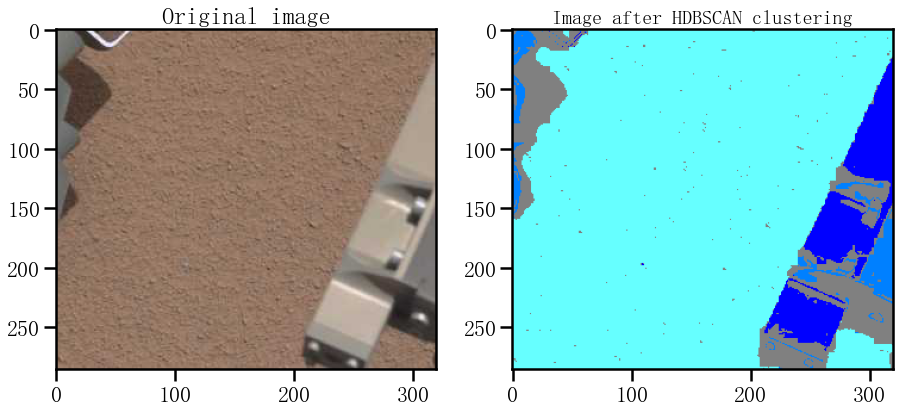

In [62]:
# Visualisation of clustering result 

# Transformation of data :
image_predict= y_predict.reshape((286,320))
im_hdb = im_array.copy()

for i in range(image_predict.shape[0]):
    for j in range(image_predict.shape[1]):
        if image_predict[i][j] == -1:
            im_hdb[i][j] = [128, 128, 128] # grey as noise point
        elif image_predict[i][j] == 0:
            im_hdb[i][j] = [102, 255, 255] # light blue as cluster 0
        elif image_predict[i][j] == 1:
            im_hdb[i][j] = [0, 128, 255] # dark blue as cluster 1 
        elif image_predict[i][j] == 2:
            im_hdb[i][j] = [0, 0, 255] # darkest blue as cluster 2

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(Im_1)
plt.title('Original image', fontsize = 20)

plt.subplot(1,2,2)
plt.imshow(im_hdb)
plt.title('Image after HDBSCAN clustering', fontsize = 20);


### Color compression

One interesting application of clustering is in color compression within images. 
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

Get a simplified 10-colored version of the following image by applying k-means. Plot both images.

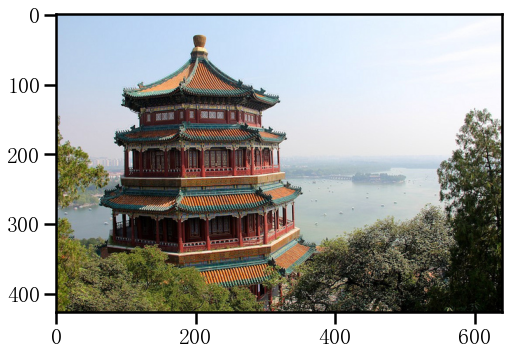

In [63]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

fig = plt.figure(figsize=(8, 6))
plt.imshow(china);

In [68]:
# TODO

# Convert the image to a NumPy array:
china_array = np.array(china)
china_array = china_array.reshape((china_array.shape[0]*china_array.shape[1], 3))

In [74]:
from sklearn.cluster import KMeans
kmeans_image = KMeans(n_clusters=10, max_iter=200)
y_predict = kmeans_image.fit(china_array)
labels = kmeans_image.labels_.reshape((china.shape[0], china.shape[1]))

In [104]:
# Calculate the mean RGB for 10 selected labels
colors = {}
for label in np.unique(kmeans_image.labels_):
    colors[label] = []

for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        colors[labels[i][j]].append([china[i][j][0], china[i][j][1], china[i][j][2]])

mean_colors = {}
for key, value in colors.items():
    mean_R = np.average(value, axis=0)[0]
    mean_G = np.average(value, axis=0)[1]
    mean_B = np.average(value, axis=0)[2]
    mean_colors[key] = [mean_R, mean_G, mean_B]

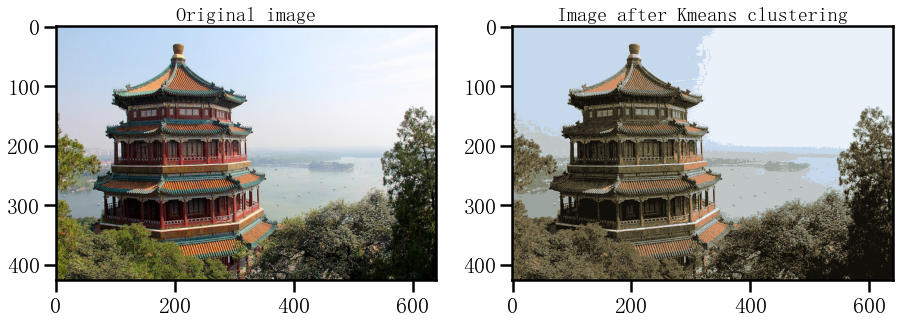

In [106]:
# Plot the initial image and the image with 10 colors:
china_kmeans = china.copy()
for i in range(china_kmeans.shape[0]):
    for j in range(china_kmeans.shape[1]):
        china_kmeans[i][j] = mean_colors[labels[i][j]]

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(china)
plt.title('Original image', fontsize = 20)

plt.subplot(1,2,2)
plt.imshow(china_kmeans)
plt.title('Image after Kmeans clustering', fontsize = 20);